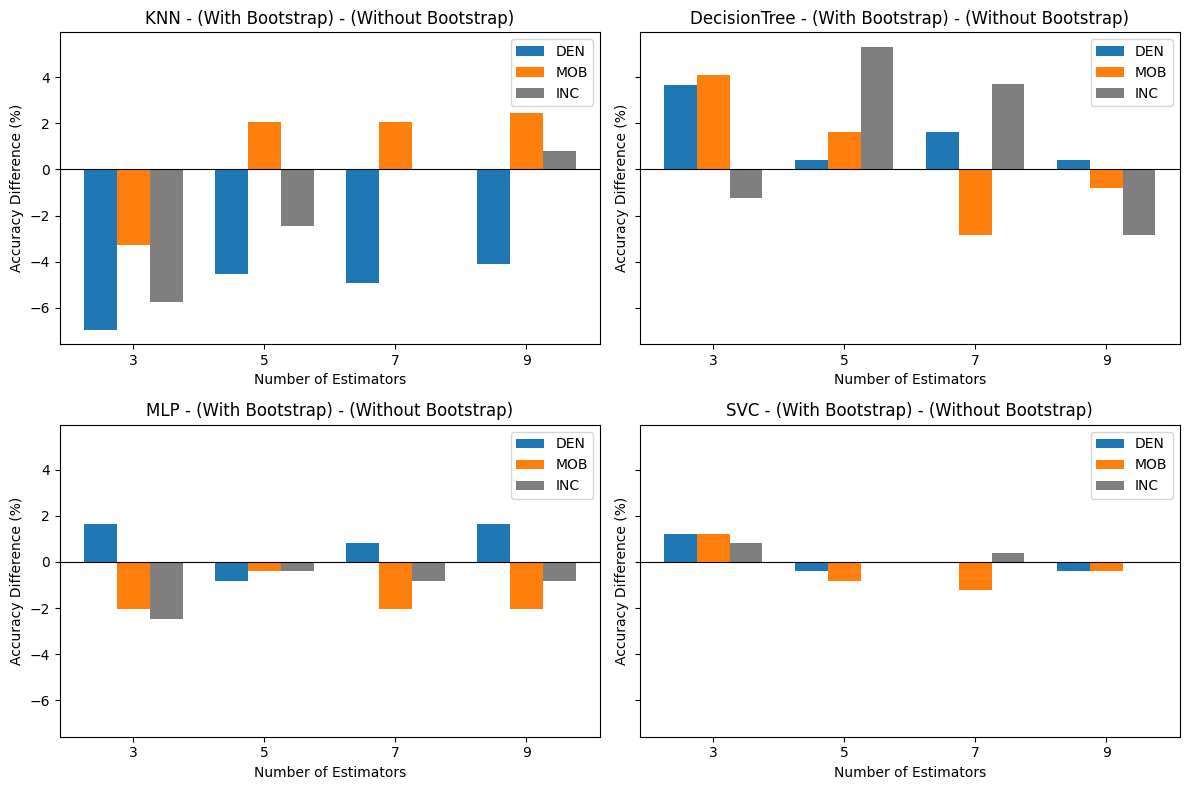

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------------------
# 1) Define the "without bootstrap" and "with bootstrap" results
#    (Accuracy in percentage) from your summary tables.
#    We'll store them in nested dictionaries for easy access.
# ------------------------------------------------------------------------------

# Without bootstrap
without_bootstrap = {
    "DenseNet201": {
        "KNN":  {3: 67.62, 5: 67.21, 7: 67.21, 9: 65.98},
        "DecisionTree": {3: 59.84, 5: 60.25, 7: 61.07, 9: 63.93},
        "MLP":  {3: 73.77, 5: 75.00, 7: 75.82, 9: 75.82},
        "SVC":  {3: 73.77, 5: 74.59, 7: 74.59, 9: 75.00},
    },
    "InceptionV3": {
        "KNN":  {3: 64.34, 5: 64.34, 7: 61.89, 9: 61.48},
        "DecisionTree": {3: 54.51, 5: 54.10, 7: 57.38, 9: 63.11},
        "MLP":  {3: 72.95, 5: 75.41, 7: 75.82, 9: 76.23},
        "SVC":  {3: 68.85, 5: 70.08, 7: 69.26, 9: 68.44},
    },
    "MobileNetV2": {
        "KNN":  {3: 68.85, 5: 68.03, 7: 70.08, 9: 68.85},
        "DecisionTree": {3: 54.92, 5: 59.84, 7: 64.34, 9: 64.34},
        "MLP":  {3: 79.51, 5: 79.10, 7: 79.92, 9: 79.92},
        "SVC":  {3: 74.59, 5: 76.23, 7: 76.23, 9: 75.82},
    }
}

# With bootstrap
with_bootstrap = {
    "DenseNet201": {
        "KNN":  {3: 60.66, 5: 62.70, 7: 62.30, 9: 61.89},
        "DecisionTree": {3: 63.52, 5: 60.66, 7: 62.70, 9: 64.34},
        "MLP":  {3: 75.41, 5: 74.18, 7: 76.64, 9: 77.46},
        "SVC":  {3: 75.00, 5: 74.18, 7: 74.59, 9: 74.59},
    },
    "InceptionV3": {
        "KNN":  {3: 58.61, 5: 61.89, 7: 61.89, 9: 62.30},
        "DecisionTree": {3: 53.28, 5: 59.43, 7: 61.07, 9: 60.25},
        "MLP":  {3: 70.49, 5: 75.00, 7: 75.00, 9: 75.41},
        "SVC":  {3: 69.67, 5: 70.08, 7: 69.67, 9: 68.44},
    },
    "MobileNetV2": {
        "KNN":  {3: 65.57, 5: 70.08, 7: 72.13, 9: 71.31},
        "DecisionTree": {3: 59.02, 5: 61.48, 7: 61.48, 9: 63.52},
        "MLP":  {3: 77.46, 5: 78.69, 7: 77.87, 9: 77.87},
        "SVC":  {3: 75.82, 5: 75.41, 7: 75.00, 9: 75.41},
    }
}

# ------------------------------------------------------------------------------
# 2) Compute the difference (with_bootstrap - without_bootstrap) for each:
#    (KNN, DecisionTree, MLP, SVC), each architecture, each # of estimators.
# ------------------------------------------------------------------------------

classifiers = ["KNN", "DecisionTree", "MLP", "SVC"]
architectures = ["DenseNet201", "MobileNetV2", "InceptionV3"]
estimators = [3, 5, 7, 9]

# We'll store the difference as: difference[clf][arch][est] = ...
difference = {}

for clf in classifiers:
    difference[clf] = {}
    for arch in architectures:
        difference[clf][arch] = {}
        for est in estimators:
            # with_bootstrap - without_bootstrap
            wb = with_bootstrap[arch][clf][est]
            woutb = without_bootstrap[arch][clf][est]
            difference[clf][arch][est] = wb - woutb

# ------------------------------------------------------------------------------
# 3) Plot the difference in a bar chart with 4 subplots:
#    one for each classifier (KNN, DecisionTree, MLP, SVC).
#    Each subplot has x-axis = [3, 5, 7, 9], and bars for [DenseNet201, MobileNetV2, InceptionV3].
# ------------------------------------------------------------------------------

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()  # Flatten to iterate easily

clf_titles = ["KNN", "DecisionTree", "MLP", "SVC"]
bar_width = 0.25

for i, clf in enumerate(classifiers):
    ax = axes[i]
    x = np.arange(len(estimators))  # [0,1,2,3] for [3,5,7,9]
    
    # We'll create 3 sets of bars for [DenseNet201, MobileNetV2, InceptionV3]
    # shift them on the x-axis
    shift = [-bar_width, 0, bar_width]
    colors = ["tab:blue", "tab:orange", "tab:gray"]
    arch_labels = ["DEN", "MOB", "INC"]
    
    for j, arch in enumerate(architectures):
        # Extract difference data for this classifier, architecture
        y_vals = [difference[clf][arch][est] for est in estimators]
        
        # Plot bars
        ax.bar(x + shift[j], y_vals, width=bar_width, color=colors[j], label=arch_labels[j])
    
    # Set x-ticks
    ax.set_xticks(x)
    ax.set_xticklabels([str(e) for e in estimators])
    ax.axhline(0, color='black', linewidth=0.8)  # Horizontal line at 0
    ax.set_title(f"{clf} - (With Bootstrap) - (Without Bootstrap)")
    ax.set_xlabel("Number of Estimators")
    ax.set_ylabel("Accuracy Difference (%)")
    ax.legend()

plt.tight_layout()
plt.show()
